In [1]:
import pandas as pd

# Replace with the path to your CSV file
file_path = ('/Users/BMI_6106/cdc-copd-related-deaths.csv')

# Read the CSV file
df = pd.read_csv(file_path, header=None)

# Count the number of cells with the value 'Suppressed'
missing_count = (df == 'Suppressed').sum().sum()

print(f'Number of missing values (Suppressed): {missing_count}')

Number of missing values (Suppressed): 18666


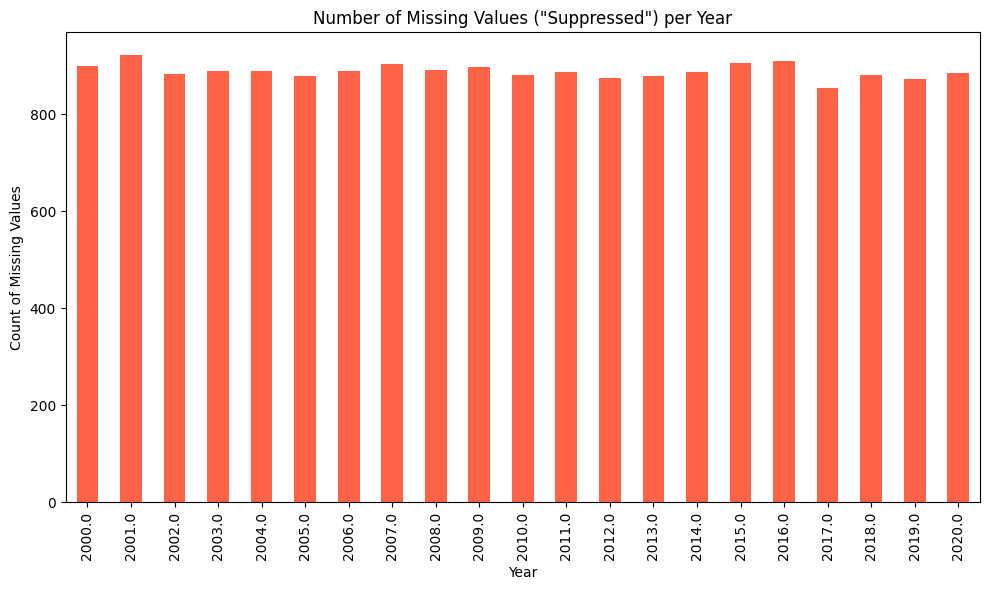

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (update the path as needed)
file_path = '/Users/BMI_6106/cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# The year is in the 4th column (index 3)
year_col = 3

# Find all rows with 'Suppressed'
suppressed_mask = df.apply(lambda row: row.astype(str).str.contains('Suppressed').any(), axis=1)

# Group by year and count suppressed rows per year
missing_per_year = df[suppressed_mask].groupby(df[year_col]).size()

# Plot
plt.figure(figsize=(10, 6))
missing_per_year.plot(kind='bar', color='tomato')
plt.title('Number of Missing Values ("Suppressed") per Year')
plt.xlabel('Year')
plt.ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()

code to see column names in the csv

In [2]:
import pandas as pd

# Load the CSV file (update the path as needed)
file_path = '/Users/BMI_6106/cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# Print the column indices and sample data
print("Column indices and sample values:")
for idx, col in enumerate(df.columns):
    print(f"Column {idx}: Sample value -> {df.iloc[0, idx]}")

Column indices and sample values:
Column 0: Sample value -> State
Column 1: Sample value -> County
Column 2: Sample value -> County Code
Column 3: Sample value -> Year
Column 4: Sample value -> Month
Column 5: Sample value -> Deaths
Column 6: Sample value -> Population
Column 7: Sample value -> Crude Rate


average number of deaths in each every month in each state per year

In [3]:
import pandas as pd

# Load the CSV file with NO header row
file_path = 'cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# Assign column names
df.columns = [
    'State', 'County', 'FIPS', 'Year', 'Month', 'Deaths', 'Col7', 'Col8'
]

# Replace 'Suppressed' with NaN and convert Deaths to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Group by State, Year, and Month, then calculate the average deaths
avg_deaths = (
    df.groupby(['State', 'Year', 'Month'])['Deaths']
    .mean()
    .reset_index()
    .rename(columns={'Deaths': 'Average_Deaths'})
)

print(avg_deaths)

          State    Year Month  Average_Deaths
0    California  2000.0   1.0       44.483871
1    California  2000.0  10.0       19.967742
2    California  2000.0  11.0       21.612903
3    California  2000.0  12.0       26.580645
4    California  2000.0   2.0       28.321429
..          ...     ...   ...             ...
752  Washington  2020.0   5.0        8.461538
753  Washington  2020.0   6.0        5.869565
754  Washington  2020.0   7.0        8.750000
755  Washington  2020.0   8.0        5.666667
756  Washington  2020.0   9.0        4.823529

[757 rows x 4 columns]


visual for averdeaths each yearh per state per month

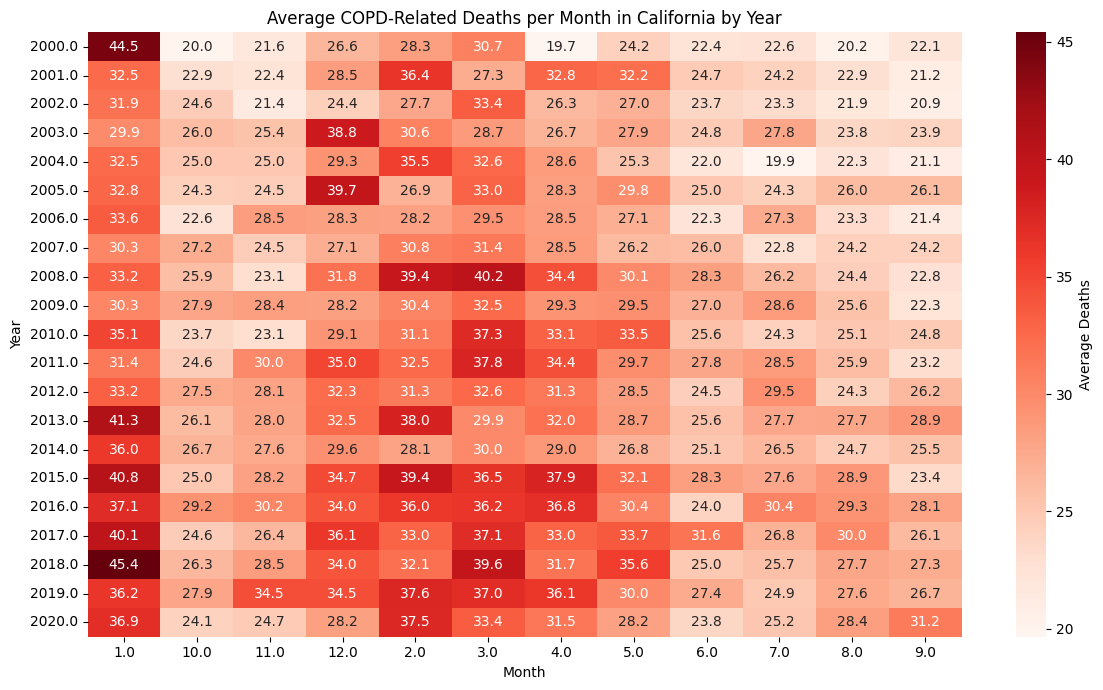

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (update the path as needed)
file_path = 'cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# Assign column names
df.columns = [
    'State', 'County', 'FIPS', 'Year', 'Month', 'Deaths', 'Col7', 'Col8'
]

# Convert Deaths to numeric, coercing errors (e.g., 'Suppressed') to NaN
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Calculate the average deaths per state, year, and month
avg_deaths = (
    df.groupby(['State', 'Year', 'Month'])['Deaths']
    .mean()
    .reset_index()
    .rename(columns={'Deaths': 'Average_Deaths'})
)

# Example visualization: Heatmap of average deaths by month and year for a single state
state_to_plot = 'California'
state_data = avg_deaths[avg_deaths['State'] == state_to_plot]

# Pivot the data for heatmap (rows: Year, columns: Month)
pivot = state_data.pivot(index='Year', columns='Month', values='Average_Deaths')

plt.figure(figsize=(12, 7))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Average Deaths'})
plt.title(f'Average COPD-Related Deaths per Month in {state_to_plot} by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


find how many hyperthermia related deaths were reported in each county of each state every year

In [6]:
import pandas as pd

# Load the CSV file (update the path as needed)
file_path = 'cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# Assign column names for clarity
df.columns = [
    'State', 'County', 'FIPS', 'Year', 'Month', 'Deaths', 'Col7', 'Col8'
]

# Convert 'Deaths' to numeric, coercing 'Suppressed' and other non-numeric to NaN
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Group by State, County, and Year, summing deaths per year per county per state
deaths_by_county_year = (
    df.groupby(['State', 'County', 'Year'])['Deaths']
    .sum(min_count=1)  # min_count=1 ensures sum is NaN if all values are NaN
    .reset_index()
    .rename(columns={'Deaths': 'Total_Deaths'})
)

print(deaths_by_county_year)

           State              County    Year  Total_Deaths
0     California  Alameda County, CA  2000.0         311.0
1     California  Alameda County, CA  2001.0         318.0
2     California  Alameda County, CA  2002.0         329.0
3     California  Alameda County, CA  2003.0         342.0
4     California  Alameda County, CA  2004.0         314.0
...          ...                 ...     ...           ...
2789  Washington   Yakima County, WA  2016.0          71.0
2790  Washington   Yakima County, WA  2017.0          73.0
2791  Washington   Yakima County, WA  2018.0          49.0
2792  Washington   Yakima County, WA  2019.0          80.0
2793  Washington   Yakima County, WA  2020.0          49.0

[2794 rows x 4 columns]


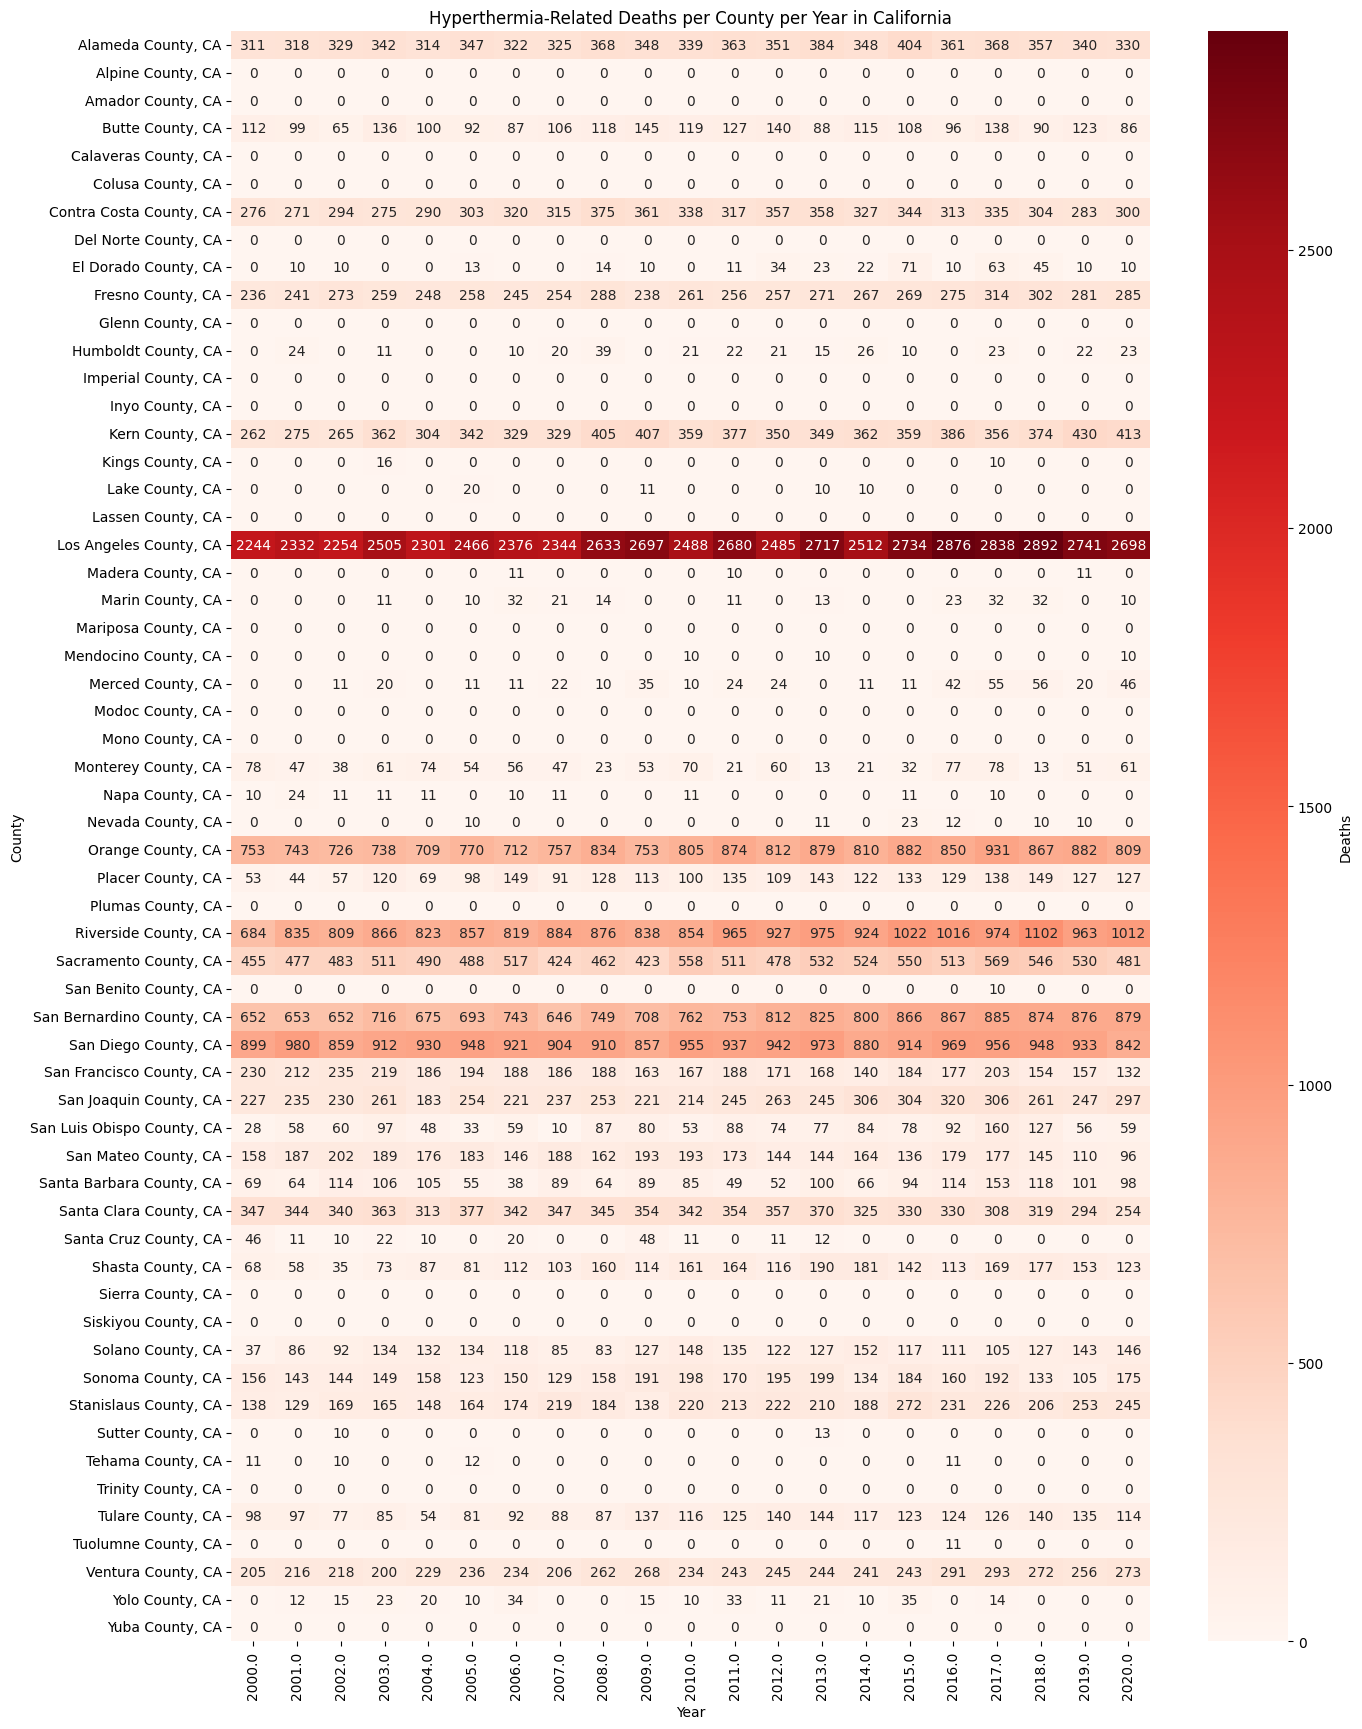

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (update path as needed)
file_path = 'cdc-copd-related-deaths.csv'
df = pd.read_csv(file_path, header=None)

# Assign column names
df.columns = [
    'State', 'County', 'FIPS', 'Year', 'Month', 'Deaths', 'Col7', 'Col8'
]

# Convert Deaths to numeric, treating 'Suppressed' and other errors as NaN
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Aggregate: sum deaths per county/state/year
deaths_by_county_year = (
    df.groupby(['State', 'County', 'Year'])['Deaths']
    .sum(min_count=1)
    .reset_index()
    .rename(columns={'Deaths': 'Total_Deaths'})
)

# --- Visualization: Heatmap for a selected state ---
# Pick a state to visualize (e.g., 'California')
state = 'California'
state_data = deaths_by_county_year[deaths_by_county_year['State'] == state]

# Pivot for heatmap: rows=County, columns=Year, values=Total_Deaths
heatmap_data = state_data.pivot(index='County', columns='Year', values='Total_Deaths').fillna(0)

plt.figure(figsize=(14, max(6, 0.3*len(heatmap_data))))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Reds', cbar_kws={'label': 'Deaths'})
plt.title(f'Hyperthermia-Related Deaths per County per Year in {state}')
plt.xlabel('Year')
plt.ylabel('County')
plt.tight_layout()
plt.show()
